In [3]:
!pip install torch torchvision matplotlib ultralytics


In [7]:
!pip install ultralytics

In [ ]:
!label-studio

In [1]:
!yolo --help

WARNING âš ï¸� argument '--help' does not require leading dashes '--', updating to 'help'.

    Arguments received: ['yolo', '--help']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of {'detect', 'pose', 'classify', 'segment', 'obb'}
                MODE (required) is one of {'train', 'export', 'track', 'val', 'benchmark', 'predict'}
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override defaults.
                    See all ARGS at https://docs.ultralytics.com/usage/cfg or with 'yolo cfg'

    1. Train a detection model for 10 epochs with an initial learning_rate of 0.01
        yolo train data=coco8.yaml model=yolo11n.pt epochs=10 lr0=0.01

    2. Predict a YouTube video using a pretrained segmentation model at image size 320:
        yolo predict model=yolo11n-seg.pt source='https://youtu.be/LNwODJXcvt4' imgsz=320

    3. Val a pretrained detection model at

In [5]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Paths to your dataset
images_dir = r"C:\Users\kavan\Downloads\python-concepts\adas\map_dataset\images"
labels_dir = r"C:\Users\kavan\Downloads\python-concepts\adas\map_dataset\labels"

# Output directories
train_images_dir = r"C:\Users\kavan\Downloads\python-concepts\adas\map_dataset\images\train"
val_images_dir = r"C:\Users\kavan\Downloads\python-concepts\adas\map_dataset\images\val"
train_labels_dir = r"C:\Users\kavan\Downloads\python-concepts\adas\map_dataset\labels\train"
val_labels_dir = r"C:\Users\kavan\Downloads\python-concepts\adas\map_dataset\labels\val"

# Create directories if not exist
os.makedirs(train_images_dir, exist_ok=True)
os.makedirs(val_images_dir, exist_ok=True)
os.makedirs(train_labels_dir, exist_ok=True)
os.makedirs(val_labels_dir, exist_ok=True)

# List all images
all_images = os.listdir(images_dir)

# Split into training and validation
train_images, val_images = train_test_split(all_images, test_size=0.2, random_state=42)

# Move training images and labels
for img in train_images:
    shutil.move(os.path.join(images_dir, img), os.path.join(train_images_dir, img))
    label = img.replace(".png", ".txt")  # Adjust for your file extension
    label_path = os.path.join(labels_dir, label)
    if os.path.exists(label_path):  # Check if label exists
        shutil.move(label_path, os.path.join(train_labels_dir, label))

# Move validation images and labels
for img in val_images:
    shutil.move(os.path.join(images_dir, img), os.path.join(val_images_dir, img))
    label = img.replace(".png", ".txt")  # Adjust for your file extension
    label_path = os.path.join(labels_dir, label)
    if os.path.exists(label_path):  # Check if label exists
        shutil.move(label_path, os.path.join(val_labels_dir, label))


FileNotFoundError: [WinError 3] The system cannot find the path specified

In [7]:
!yolo task=detect mode=train model=yolov8n.pt data=C:\Users\kavan\Downloads\python-concepts\adas\map_dataset\data.yaml epochs=50 imgsz=640

Ultralytics 8.3.51 ðŸš€ Python-3.12.7 torch-2.5.1+cpu CPU (Intel Core(TM) i5-10300H 2.50GHz)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=C:\Users\kavan\Downloads\python-concepts\adas\map_dataset\data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop


  0%|          | 0.00/6.25M [00:00<?, ?B/s]
  2%|2         | 128k/6.25M [00:00<00:05, 1.08MB/s]
  6%|6         | 384k/6.25M [00:00<00:03, 1.79MB/s]
 12%|#2        | 768k/6.25M [00:00<00:02, 2.68MB/s]
 20%|##        | 1.25M/6.25M [00:00<00:01, 3.52MB/s]
 30%|###       | 1.88M/6.25M [00:00<00:01, 4.09MB/s]
 40%|####      | 2.50M/6.25M [00:00<00:01, 3.92MB/s]
 48%|####8     | 3.00M/6.25M [00:00<00:00, 4.20MB/s]
 56%|#####6    | 3.50M/6.25M [00:00<00:00, 4.48MB/s]
 64%|######4   | 4.00M/6.25M [00:01<00:00, 4.65MB/s]
 72%|#######2  | 4.50M/6.25M [00:01<00:00, 4.80MB/s]
 82%|########2 | 5.12M/6.25M [00:01<00:00, 5.06MB/s]
 92%|#########2| 5.75M/6.25M [00:01<00:00, 5.35MB/s]
100%|##########| 6.25M/6.25M [00:01<00:00, 4.45MB/s]

  0%|          | 0.00/755k [00:00<?, ?B/s]
 34%|###3      | 256k/755k [00:00<00:00, 1.91MB/s]
 68%|######7   | 512k/755k [00:00<00:00, 2.25MB/s]
100%|##########| 755k/755k [00:00<00:00, 2.42MB/s]

train: Scanning C:\Users\kavan\Downloads\python-concepts\adas\map_datas

In [10]:
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt conf=0.1 source=C:\Users\kavan\Downloads\python-concepts\adas\map_dataset\test

Ultralytics 8.3.51 ðŸš€ Python-3.12.7 torch-2.5.1+cpu CPU (Intel Core(TM) i5-10300H 2.50GHz)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs

image 1/8 C:\Users\kavan\Downloads\python-concepts\adas\map_dataset\test\Screenshot 2024-12-18 001642.png: 448x640 (no detections), 71.7ms
image 2/8 C:\Users\kavan\Downloads\python-concepts\adas\map_dataset\test\Screenshot 2024-12-18 001655.png: 448x640 (no detections), 55.7ms
image 3/8 C:\Users\kavan\Downloads\python-concepts\adas\map_dataset\test\Screenshot 2024-12-18 001709.png: 448x640 (no detections), 60.2ms
image 4/8 C:\Users\kavan\Downloads\python-concepts\adas\map_dataset\test\Screenshot 2024-12-18 001719.png: 448x640 (no detections), 53.2ms
image 5/8 C:\Users\kavan\Downloads\python-concepts\adas\map_dataset\test\Screenshot 2024-12-18 095136.png: 512x640 (no detections), 72.8ms
image 6/8 C:\Users\kavan\Downloads\python-concepts\adas\map_dataset\test\Screenshot 2024-12-19 194441.png: 480x640 (no detections)

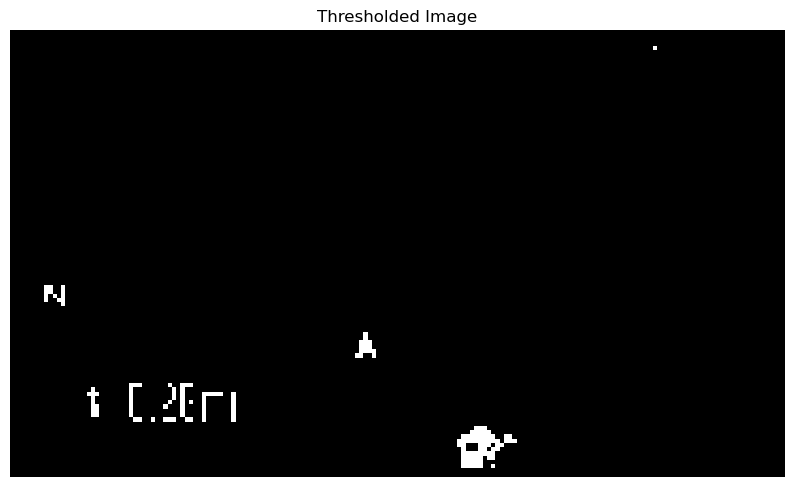

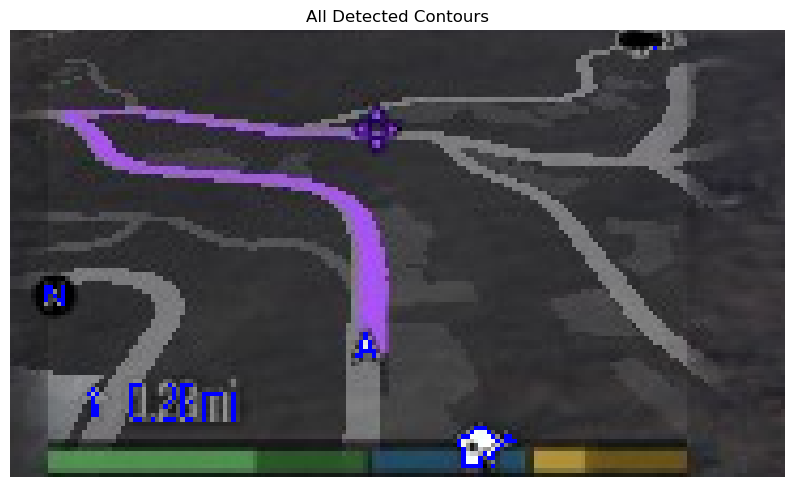

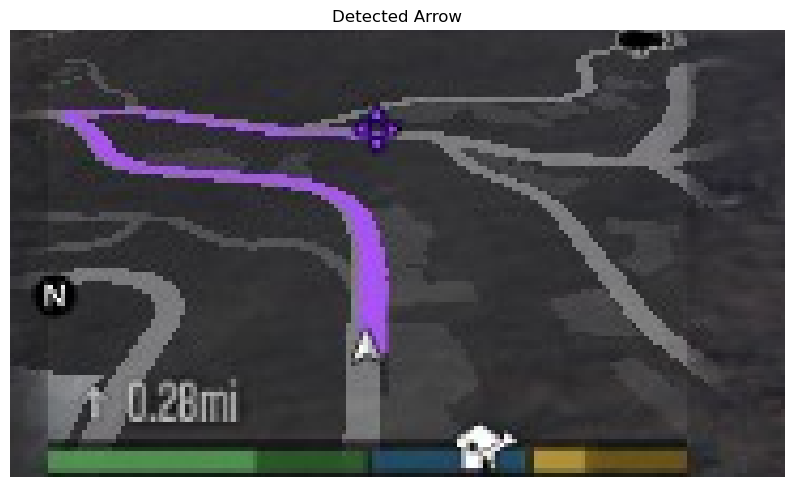

False

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the image
image = cv2.imread(r"C:\Users\kavan\OneDrive\Pictures\Screenshots\Screenshot 2024-12-17 181749.png")

# Step 2: Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Step 3: Apply thresholding
_, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)  # Lowered threshold value

# Debugging: Show the thresholded image
plt.figure(figsize=(10, 6))
plt.imshow(thresh, cmap='gray')
plt.title('Thresholded Image')
plt.axis('off')
plt.show()

# Step 4: Detect contours
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Debugging: Draw all contours
image_all_contours = image.copy()
cv2.drawContours(image_all_contours, contours, -1, (255, 0, 0), 1)
image_rgb_all = cv2.cvtColor(image_all_contours, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 6))
plt.imshow(image_rgb_all)
plt.title('All Detected Contours')
plt.axis('off')
plt.show()

# Step 5: Filter contours based on size and shape
for contour in contours:
    # Approximate the contour
    epsilon = 0.02 * cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon, True)

    # Check if the contour has a specific number of points (e.g., a triangle-like shape for the arrowhead)
    if len(approx) >= 3 and len(approx) <= 10:  # Relaxed range for arrow shape
        x, y, w, h = cv2.boundingRect(approx)
        aspect_ratio = w / float(h)

        # Further filter based on aspect ratio and size
        if w > 5 and h > 5:  # Removed aspect ratio filtering temporarily
            cv2.drawContours(image, [approx], -1, (0, 255, 0), 2)  # Draw the contour

# Step 6: Show the result using matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(image_rgb)
plt.title('Detected Arrow')
plt.axis('off')
plt.show()

# Optional: Save the output image
cv2.imwrite('/mnt/data/detected_arrow.png', image)


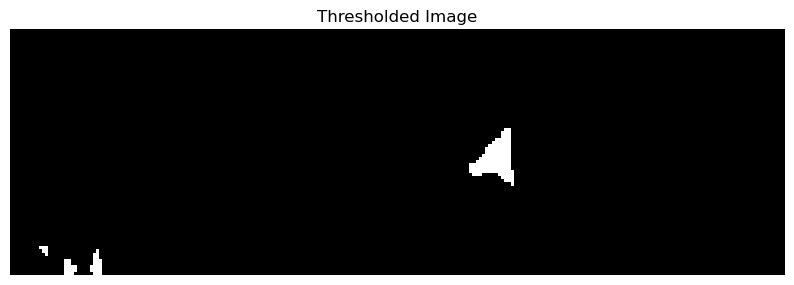

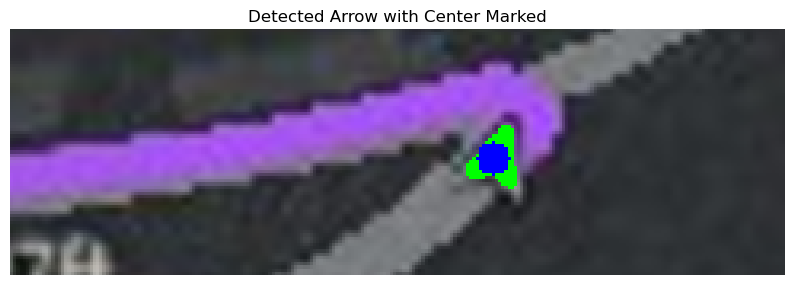

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_arrow(image_path):
    # Step 1: Load the image
    image = cv2.imread(image_path)

    # Step 2: Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Step 3: Apply thresholding
    _, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)  # Adjusted threshold value

    # Step 4: Detect contours
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    detected_arrow_center = None

    # Step 5: Filter contours specifically for the arrow-like shape
    for contour in contours:
        # Approximate the contour
        epsilon = 0.05 * cv2.arcLength(contour, True)  # Adjusted epsilon for more flexibility
        approx = cv2.approxPolyDP(contour, epsilon, True)

        # Check if the contour has 3-10 vertices (allowing gaps and irregularities)
        if 3 <= len(approx) <= 10:
            area = cv2.contourArea(contour)
            if 100 < area < 5000:  # Adjusted area threshold to include larger shapes
                x, y, w, h = cv2.boundingRect(contour)

                # Further filter based on aspect ratio (for arrow-like shapes)
                aspect_ratio = float(w) / h
                if 0.3 < aspect_ratio < 3.0:  # Relaxed aspect ratio range
                    # Compute the centroid of the contour
                    M = cv2.moments(contour)
                    if M["m00"] != 0:
                        cX = int(M["m10"] / M["m00"])
                        cY = int(M["m01"] / M["m00"])

                        detected_arrow_center = (cX, cY)

                        # Mark the contour and centroid on the image
                        cv2.drawContours(image, [contour], -1, (0, 255, 0), 2)
                        cv2.circle(image, (cX, cY), 5, (255, 0, 0), -1)

    # Step 6: Template Matching as a fallback
    if detected_arrow_center is None:
        template = np.zeros((50, 50), dtype=np.uint8)
        points = np.array([[25, 0], [50, 50], [25, 35], [0, 50]], np.int32)
        cv2.fillPoly(template, [points], 255)

        res = cv2.matchTemplate(thresh, template, cv2.TM_CCOEFF_NORMED)
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

        if max_val > 0.5:  # Threshold for template matching
            detected_arrow_center = (max_loc[0] + 25, max_loc[1] + 25)  # Adjust for template size
            cv2.rectangle(image, max_loc, (max_loc[0] + 50, max_loc[1] + 50), (0, 255, 0), 2)
            cv2.circle(image, detected_arrow_center, 5, (255, 0, 0), -1)

    # Debugging: Show the thresholded image
    plt.figure(figsize=(10, 6))
    plt.imshow(thresh, cmap='gray')
    plt.title('Thresholded Image')
    plt.axis('off')
    plt.show()

    # Step 7: Show the final result
    if detected_arrow_center is not None:
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for matplotlib
        plt.figure(figsize=(10, 6))
        plt.imshow(image_rgb)
        plt.title('Detected Arrow with Center Marked')
        plt.axis('off')
        plt.show()

        # Optional: Save the output image
        cv2.imwrite('/mnt/data/detected_arrow_center.png', image)
    else:
        print("Arrow not detected.")

# Call the function with the given image path
detect_arrow(r"C:\Users\kavan\OneDrive\Pictures\Screenshots\Screenshot 2024-12-20 155631.png")


In [68]:
import cv2
import numpy as np
import math
import mss

# Define the minimap region (800x600 screen coordinates)
minimap_region = [(13, 489), (163, 485), (163, 590), (14, 591)]
pointer_position = (87, 559)  # Pointer position in minimap coordinates

def extract_minimap(frame, region):
    """Extract the minimap from the screen based on given coordinates."""
    x_min, y_min = region[0]
    x_max, y_max = region[2]
    return frame[y_min:y_max, x_min:x_max]

def detect_path(frame, pointer_position, nearby_threshold=30):
    """
    Detect the purple/pink path on the minimap and calculate angles for direction detection.
    """
    # Convert frame to HSV for color segmentation
    hsv_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    # Flexible range for purple/pink path
    lower_pink = np.array([140, 40, 40])  # Adjust lower bound
    upper_pink = np.array([170, 255, 255])  # Adjust upper bound
    mask = cv2.inRange(hsv_frame, lower_pink, upper_pink)

    # Clean up the mask using morphological operations
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

    # Find contours of the path
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    path_points = []
    for contour in contours:
        # Approximate contour and filter small/noisy contours
        epsilon = 0.01 * cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, epsilon, True)
        for point in approx:
            x, y = point[0]
            path_points.append((x, y))

    # Sort path points based on their distance to the pointer
    path_points = sorted(path_points, key=lambda p: np.sqrt((p[0] - pointer_position[0])**2 + (p[1] - pointer_position[1])**2))

    # Filter nearby points around the pointer
    nearby_points = [p for p in path_points if abs(p[0] - pointer_position[0]) <= nearby_threshold and abs(p[1] - pointer_position[1]) <= nearby_threshold]

    # Calculate angles to the nearby points
    angles = []
    for point in nearby_points:
        dx = point[0] - pointer_position[0]
        dy = pointer_position[1] - point[1]  # Flip Y-axis for correct orientation
        angle = math.degrees(math.atan2(dy, dx))
        angles.append(angle)

    # Decision logic based on angles
    if angles:
        avg_angle = np.mean(angles)
        if avg_angle < -10:  # Points are to the left
            decision = "Turn Left"
        elif avg_angle > 10:  # Points are to the right
            decision = "Turn Right"
        else:  # Points are mostly aligned
            decision = "Go Straight"
    else:
        decision = "No Path Detected"

    return decision, path_points, mask

def main():
    # Screen capture region (800x600 full screen)
    monitor = {"top": 40 , "left": 0, "width": 800, "height": 600}

    # OpenCV window setup
    cv2.namedWindow("Full Screen with Minimap", cv2.WINDOW_NORMAL)

    with mss.mss() as sct:
        while True:
            # Capture the screen
            screenshot = sct.grab(monitor)
            full_frame = np.array(screenshot)
            full_frame = cv2.cvtColor(full_frame, cv2.COLOR_RGBA2BGR)

            # Extract minimap region
            minimap = extract_minimap(full_frame, minimap_region)

            # Detect the path and make a decision
            decision, path_points, mask = detect_path(minimap, pointer_position)

            # Visualize the results on the minimap
            for p in path_points:
                cv2.circle(minimap, p, 2, (0, 255, 0), -1)  # Green dots for path points
            cv2.circle(minimap, (pointer_position[0] - minimap_region[0][0],
                                 pointer_position[1] - minimap_region[0][1]), 5, (255, 0, 0), -1)  # Blue pointer
            cv2.putText(minimap, decision, (10, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)

            # Overlay the minimap back on the full frame for visualization
            overlay = full_frame.copy()
            minimap_height, minimap_width, _ = minimap.shape
            overlay[minimap_region[0][1]:minimap_region[0][1] + minimap_height,
                    minimap_region[0][0]:minimap_region[0][0] + minimap_width] = minimap

            # Display the full screen with overlay and minimap
            cv2.imshow("Full Screen with Minimap", overlay)
            cv2.imshow("Minimap Mask", mask)

            # Break on 'q' key press
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break

    cv2.destroyAllWindows()

if __name__ == "__main__":
    main()


In [4]:
import cv2
import numpy as np
import math
import mss

# Define the minimap region (800x600 screen coordinates)
minimap_region = [(13, 489), (163, 485), (163, 590), (14, 591)]
pointer_position = (87, 559)  # Pointer position in minimap coordinates


def extract_minimap(frame, region):
    """Extract the minimap from the screen based on given coordinates."""
    x_min, y_min = region[0]
    x_max, y_max = region[2]
    return frame[y_min:y_max, x_min:x_max]


def detect_path(frame, pointer_position, nearby_threshold=30):
    """
    Detect the pink path on the minimap and calculate the direction based on angles.
    """
    # Convert frame to HSV for color segmentation
    hsv_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    # Adjusted HSV range for pink detection
    lower_pink = np.array([130, 50, 50])
    upper_pink = np.array([170, 255, 255])
    mask = cv2.inRange(hsv_frame, lower_pink, upper_pink)

    # Apply Gaussian blur to reduce noise
    mask = cv2.GaussianBlur(mask, (5, 5), 0)

    # Clean up the mask using morphological operations
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

    # Find contours of the path
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    path_points = []
    for contour in contours:
        if cv2.contourArea(contour) > 100:  # Filter out very small areas
            for point in contour:
                x, y = point[0]
                path_points.append((x, y))

    if not path_points:
        return "No Path Detected", [], mask

    # Sort path points based on their distance to the pointer
    path_points = sorted(path_points, key=lambda p: np.sqrt((p[0] - pointer_position[0])**2 + (p[1] - pointer_position[1])**2))

    # Use the closest points for decision-making
    if len(path_points) > 2:
        # Fit a line to the points
        path_points_np = np.array(path_points)
        [vx, vy, x, y] = cv2.fitLine(path_points_np, cv2.DIST_L2, 0, 0.01, 0.01)

        # Calculate angle from the line vector
        angle = math.degrees(math.atan2(vy, vx))

        # Decision logic based on the angle
        if angle > 15:
            decision = "Turn Right"
        elif angle < -15:
            decision = "Turn Left"
        else:
            decision = "Go Straight"
    else:
        decision = "No Path Detected"

    return decision, path_points, mask


def main():
    # Screen capture region (800x600 full screen)
    monitor = {"top": 40, "left": 0, "width": 800, "height": 600}

    # OpenCV window setup
    cv2.namedWindow("Minimap", cv2.WINDOW_NORMAL)

    with mss.mss() as sct:
        while True:
            # Capture the screen
            screenshot = sct.grab(monitor)
            full_frame = np.array(screenshot)
            full_frame = cv2.cvtColor(full_frame, cv2.COLOR_RGBA2BGR)

            # Extract minimap region
            minimap = extract_minimap(full_frame, minimap_region)

            # Detect the path and make a decision
            decision, path_points, mask = detect_path(minimap, pointer_position)

            # Visualize the results on the minimap
            for p in path_points:
                cv2.circle(minimap, p, 2, (0, 255, 0), -1)  # Green dots for path points
            cv2.circle(minimap, (pointer_position[0] - minimap_region[0][0],
                                 pointer_position[1] - minimap_region[0][1]), 5, (255, 0, 0), -1)  # Blue pointer
            cv2.putText(minimap, decision, (10, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)

            # Display the minimap with path detection
            cv2.imshow("Minimap", minimap)

            # Break on 'q' key press
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break

    cv2.destroyAllWindows()


if __name__ == "__main__":
    main()


C:\Users\kavan\AppData\Local\Temp\ipykernel_20716\1737264634.py:61: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  angle = math.degrees(math.atan2(vy, vx))


In [6]:
import cv2
import numpy as np
import math
import mss

class PathDetector:
    def __init__(self):
        # Define the minimap region coordinates
        self.minimap_region = [(13, 489), (163, 485), (163, 590), (14, 591)]
        self.pointer_position = (87, 559)
        
        # Tunable parameters
        self.path_detection_params = {
            'min_area': 100,
            'angle_threshold': 10,  # Reduced from 15 to be more sensitive
            'nearby_points_threshold': 40,
            'segment_length': 30  # Length of path segment to analyze
        }

    def extract_minimap(self, frame):
        """Extract the minimap region from the full frame."""
        x_min, y_min = self.minimap_region[0]
        x_max, y_max = self.minimap_region[2]
        return frame[y_min:y_max, x_min:x_max]

    def preprocess_image(self, frame):
        """Enhanced preprocessing for better path detection."""
        # Convert to HSV for more robust color detection
        hsv_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        
        # Adjusted HSV range for pink/magenta path
        lower_pink = np.array([140, 50, 50])  # Adjusted from 130
        upper_pink = np.array([170, 255, 255])
        
        # Create initial mask
        mask = cv2.inRange(hsv_frame, lower_pink, upper_pink)
        
        # Enhanced noise reduction
        mask = cv2.GaussianBlur(mask, (5, 5), 0)
        
        # Morphological operations for cleaner path detection
        kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
        mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
        mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
        
        return mask

    def get_path_direction(self, frame):
        """Improved path direction detection algorithm."""
        # Preprocess the image
        mask = self.preprocess_image(frame)
        
        # Find contours
        contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        
        if not contours:
            return "No Path Detected", [], mask
        
        # Get the largest contour (main path)
        main_path = max(contours, key=cv2.contourArea)
        
        if cv2.contourArea(main_path) < self.path_detection_params['min_area']:
            return "No Path Detected", [], mask
        
        # Convert contour to points
        path_points = [point[0] for point in main_path]
        
        # Find points near the pointer
        pointer_x = self.pointer_position[0] - self.minimap_region[0][0]
        pointer_y = self.pointer_position[1] - self.minimap_region[0][1]
        
        # Sort points by distance to pointer
        path_points.sort(key=lambda p: ((p[0] - pointer_x)**2 + (p[1] - pointer_y)**2)**0.5)
        
        # Get nearby points for direction analysis
        nearby_points = [p for p in path_points 
                        if ((p[0] - pointer_x)**2 + (p[1] - pointer_y)**2)**0.5 
                        < self.path_detection_params['nearby_points_threshold']]
        
        if len(nearby_points) < 2:
            return "No Path Detected", path_points, mask
        
        # Calculate direction using nearby points
        direction_vector = np.array(nearby_points[-1]) - np.array(nearby_points[0])
        angle = math.degrees(math.atan2(direction_vector[1], direction_vector[0]))
        
        # Normalize angle to -180 to 180 range
        angle = (angle + 180) % 360 - 180
        
        # Determine direction based on angle
        threshold = self.path_detection_params['angle_threshold']
        if abs(angle) < threshold:
            decision = "Go Straight"
        elif angle > 0:
            decision = "Turn Left"  # Inverted from original to fix direction
        else:
            decision = "Turn Right"
        
        return decision, path_points, mask

    def visualize_detection(self, frame, decision, path_points):
        """Visualize the path detection results."""
        result = frame.copy()
        
        # Draw path points
        for point in path_points:
            cv2.circle(result, tuple(map(int, point)), 2, (0, 255, 0), -1)
        
        # Draw pointer position
        pointer_x = self.pointer_position[0] - self.minimap_region[0][0]
        pointer_y = self.pointer_position[1] - self.minimap_region[0][1]
        cv2.circle(result, (pointer_x, pointer_y), 5, (255, 0, 0), -1)
        
        # Add decision text
        cv2.putText(result, decision, (10, 20), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)
        
        return result

def main():
    detector = PathDetector()
    monitor = {"top": 40, "left": 0, "width": 800, "height": 600}
    
    cv2.namedWindow("Path Detection", cv2.WINDOW_NORMAL)
    
    with mss.mss() as sct:
        while True:
            # Capture screen
            screenshot = sct.grab(monitor)
            frame = np.array(screenshot)
            frame = cv2.cvtColor(frame, cv2.COLOR_RGBA2BGR)
            
            # Extract minimap
            minimap = detector.extract_minimap(frame)
            
            # Process path detection
            decision, path_points, mask = detector.get_path_direction(minimap)
            
            # Visualize results
            result = detector.visualize_detection(minimap, decision, path_points)
            
            # Show results
            cv2.imshow("Path Detection", result)
            
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break
    
    cv2.destroyAllWindows()

if __name__ == "__main__":
    main()

In [8]:
import cv2
import numpy as np
import math
import mss

class PathDetector:
    def __init__(self):
        self.minimap_region = [(13, 489), (163, 485), (163, 590), (14, 591)]
        self.pointer_position = (87, 559)
        
        self.path_detection_params = {
            'min_area': 100,
            'angle_threshold': 10,
            'nearby_points_threshold': 40,
            'look_ahead_distance': 30  # Distance to look ahead for direction
        }

    def extract_minimap(self, frame):
        x_min, y_min = self.minimap_region[0]
        x_max, y_max = self.minimap_region[2]
        return frame[y_min:y_max, x_min:x_max]

    def preprocess_image(self, frame):
        hsv_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        
        # Adjusted HSV range for better pink path detection
        lower_pink = np.array([140, 50, 50])
        upper_pink = np.array([170, 255, 255])
        
        mask = cv2.inRange(hsv_frame, lower_pink, upper_pink)
        mask = cv2.GaussianBlur(mask, (5, 5), 0)
        
        kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
        mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
        mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
        
        return mask

    def get_path_direction(self, frame):
        """Improved direction detection with fixed left/right logic."""
        mask = self.preprocess_image(frame)
        contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        
        if not contours:
            return "No Path Detected", [], mask
        
        # Get the largest contour
        main_path = max(contours, key=cv2.contourArea)
        
        if cv2.contourArea(main_path) < self.path_detection_params['min_area']:
            return "No Path Detected", [], mask
        
        # Convert contour to points
        path_points = [point[0] for point in main_path]
        
        # Get pointer position relative to minimap
        pointer_x = self.pointer_position[0] - self.minimap_region[0][0]
        pointer_y = self.pointer_position[1] - self.minimap_region[0][1]
        pointer = np.array([pointer_x, pointer_y])
        
        # Find closest point on path to pointer
        closest_point_idx = min(range(len(path_points)), 
                              key=lambda i: np.linalg.norm(np.array(path_points[i]) - pointer))
        
        # Find a point ahead on the path
        look_ahead_distance = self.path_detection_params['look_ahead_distance']
        ahead_points = []
        
        # Collect points ahead of the closest point
        for i in range(len(path_points)):
            point = np.array(path_points[i])
            if np.linalg.norm(point - np.array(path_points[closest_point_idx])) <= look_ahead_distance:
                ahead_points.append(point)
        
        if len(ahead_points) < 2:
            return "No Path Detected", path_points, mask
        
        # Calculate direction vector
        path_vector = ahead_points[-1] - ahead_points[0]
        
        # Calculate the reference vector (straight ahead)
        reference_vector = np.array([0, -1])  # Pointing up
        
        # Calculate cross product to determine left/right
        cross_product = np.cross(reference_vector, path_vector)
        
        # Calculate angle
        angle = math.degrees(math.atan2(path_vector[1], path_vector[0]))
        
        # Determine direction based on cross product and angle
        threshold = self.path_detection_params['angle_threshold']
        if abs(angle) < threshold:
            decision = "Go Straight"
        else:
            # Use cross product to determine left/right
            decision = "Turn Left" if cross_product < 0 else "Turn Right"
        
        return decision, path_points, mask

    def visualize_detection(self, frame, decision, path_points):
        result = frame.copy()
        
        # Draw path points
        for point in path_points:
            cv2.circle(result, tuple(map(int, point)), 2, (0, 255, 0), -1)
        
        # Draw pointer
        pointer_x = self.pointer_position[0] - self.minimap_region[0][0]
        pointer_y = self.pointer_position[1] - self.minimap_region[0][1]
        cv2.circle(result, (pointer_x, pointer_y), 5, (255, 0, 0), -1)
        
        # Add decision text
        cv2.putText(result, decision, (10, 20), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)
        
        return result

def main():
    detector = PathDetector()
    monitor = {"top": 40, "left": 0, "width": 800, "height": 600}
    
    cv2.namedWindow("Path Detection", cv2.WINDOW_NORMAL)
    
    with mss.mss() as sct:
        while True:
            screenshot = sct.grab(monitor)
            frame = np.array(screenshot)
            frame = cv2.cvtColor(frame, cv2.COLOR_RGBA2BGR)
            
            minimap = detector.extract_minimap(frame)
            decision, path_points, mask = detector.get_path_direction(minimap)
            result = detector.visualize_detection(minimap, decision, path_points)
            
            cv2.imshow("Path Detection", result)
            
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break
    
    cv2.destroyAllWindows()

if __name__ == "__main__":
    main()

In [10]:
import cv2
import numpy as np
import math
import mss

class PathDetector:
    def __init__(self):
        self.minimap_region = [(13, 489), (163, 485), (163, 590), (14, 591)]
        self.pointer_position = (87, 559)
        
        self.path_detection_params = {
            'min_area': 100,
            'angle_threshold': 10,
            'nearby_points_threshold': 30,
            'look_ahead_distance': 40
        }

    def extract_minimap(self, frame):
        x_min, y_min = self.minimap_region[0]
        x_max, y_max = self.minimap_region[2]
        return frame[y_min:y_max, x_min:x_max]

    def preprocess_image(self, frame):
        hsv_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        
        # Adjusted HSV range for better pink path detection
        lower_pink = np.array([140, 50, 50])
        upper_pink = np.array([170, 255, 255])
        
        mask = cv2.inRange(hsv_frame, lower_pink, upper_pink)
        mask = cv2.GaussianBlur(mask, (5, 5), 0)
        
        kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
        mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
        mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
        
        return mask

    def get_path_segments(self, points, pointer):
        """Break path into segments and analyze direction."""
        segments = []
        current_segment = []
        
        # Sort points by distance from pointer
        points = sorted(points, key=lambda p: np.linalg.norm(np.array(p) - pointer))
        
        # Get closest point to pointer
        closest_point = points[0]
        
        # Create segments of points
        for point in points:
            dist = np.linalg.norm(np.array(point) - np.array(closest_point))
            if dist <= self.path_detection_params['look_ahead_distance']:
                current_segment.append(point)
            
        return current_segment

    def get_path_direction(self, frame):
        """Improved direction detection focusing on path curvature."""
        mask = self.preprocess_image(frame)
        contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        
        if not contours:
            return "No Path Detected", [], mask
        
        # Get the largest contour
        main_path = max(contours, key=cv2.contourArea)
        
        if cv2.contourArea(main_path) < self.path_detection_params['min_area']:
            return "No Path Detected", [], mask
        
        # Convert contour to points
        path_points = [point[0] for point in main_path]
        
        # Get pointer position relative to minimap
        pointer_x = self.pointer_position[0] - self.minimap_region[0][0]
        pointer_y = self.pointer_position[1] - self.minimap_region[0][1]
        pointer = np.array([pointer_x, pointer_y])
        
        # Get relevant path segment
        segment = self.get_path_segments(path_points, pointer)
        
        if len(segment) < 3:
            return "No Path Detected", path_points, mask
        
        # Calculate direction using first and last points of segment
        start_point = np.array(segment[0])
        end_point = np.array(segment[-1])
        
        # Calculate vectors
        forward_vector = np.array([0, -1])  # Up direction
        path_vector = end_point - start_point
        
        # Calculate angle between vectors
        angle = np.arctan2(path_vector[1], path_vector[0]) - np.arctan2(forward_vector[1], forward_vector[0])
        angle = np.degrees(angle)
        
        # Normalize angle to -180 to 180 range
        angle = (angle + 180) % 360 - 180
        
        # Determine direction based on angle
        threshold = self.path_detection_params['angle_threshold']
        if abs(angle) < threshold:
            decision = "Go Straight"
        else:
            # Invert the direction logic
            decision = "Turn Left" if angle > 0 else "Turn Right"
        
        return decision, path_points, mask

    def visualize_detection(self, frame, decision, path_points):
        result = frame.copy()
        
        # Draw path points
        for point in path_points:
            cv2.circle(result, tuple(map(int, point)), 2, (0, 255, 0), -1)
        
        # Draw pointer
        pointer_x = self.pointer_position[0] - self.minimap_region[0][0]
        pointer_y = self.pointer_position[1] - self.minimap_region[0][1]
        cv2.circle(result, (pointer_x, pointer_y), 5, (255, 0, 0), -1)
        
        # Add decision text
        cv2.putText(result, decision, (10, 20), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)
        
        return result

def main():
    detector = PathDetector()
    monitor = {"top": 40, "left": 0, "width": 800, "height": 600}
    
    cv2.namedWindow("Path Detection", cv2.WINDOW_NORMAL)
    
    with mss.mss() as sct:
        while True:
            screenshot = sct.grab(monitor)
            frame = np.array(screenshot)
            frame = cv2.cvtColor(frame, cv2.COLOR_RGBA2BGR)
            
            minimap = detector.extract_minimap(frame)
            decision, path_points, mask = detector.get_path_direction(minimap)
            result = detector.visualize_detection(minimap, decision, path_points)
            
            cv2.imshow("Path Detection", result)
            
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break
    
    cv2.destroyAllWindows()

if __name__ == "__main__":
    main()

In [12]:
import cv2
import numpy as np
import math
import mss

class PathDetector:
    def __init__(self):
        self.minimap_region = [(13, 489), (163, 485), (163, 590), (14, 591)]
        self.pointer_position = (87, 559)
        
        self.path_detection_params = {
            'min_area': 100,
            'angle_threshold': 10,
            'nearby_points_threshold': 30,
            'look_ahead_distance': 40
        }

    def extract_minimap(self, frame):
        x_min, y_min = self.minimap_region[0]
        x_max, y_max = self.minimap_region[2]
        return frame[y_min:y_max, x_min:x_max]

    def preprocess_image(self, frame):
        hsv_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        lower_pink = np.array([140, 50, 50])
        upper_pink = np.array([170, 255, 255])
        mask = cv2.inRange(hsv_frame, lower_pink, upper_pink)
        mask = cv2.GaussianBlur(mask, (5, 5), 0)
        kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
        mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
        mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
        return mask

    def get_path_direction(self, frame):
        """Improved direction detection with emphasis on left turn detection."""
        mask = self.preprocess_image(frame)
        contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        
        if not contours:
            return "No Path Detected", [], mask
        
        main_path = max(contours, key=cv2.contourArea)
        if cv2.contourArea(main_path) < self.path_detection_params['min_area']:
            return "No Path Detected", [], mask
        
        # Get pointer position relative to minimap
        pointer_x = self.pointer_position[0] - self.minimap_region[0][0]
        pointer_y = self.pointer_position[1] - self.minimap_region[0][1]
        pointer = np.array([pointer_x, pointer_y])
        
        # Convert contour to points and sort by distance to pointer
        path_points = [point[0] for point in main_path]
        path_points.sort(key=lambda p: np.linalg.norm(np.array(p) - pointer))
        
        # Get points within look_ahead_distance
        nearby_points = []
        for point in path_points:
            dist = np.linalg.norm(np.array(point) - pointer)
            if dist <= self.path_detection_params['look_ahead_distance']:
                nearby_points.append(point)
        
        if len(nearby_points) < 3:
            return "No Path Detected", path_points, mask
            
        # Get three key points: start (closest to pointer), mid, and end
        start_point = np.array(nearby_points[0])
        mid_point = np.array(nearby_points[len(nearby_points)//2])
        end_point = np.array(nearby_points[-1])
        
        # Calculate vectors
        v1 = mid_point - start_point
        v2 = end_point - mid_point
        
        # Calculate cross product to determine turn direction
        cross_product = np.cross(v1, v2)
        
        # Calculate dot product for angle
        dot_product = np.dot(v1, v2)
        angle = np.arccos(dot_product / (np.linalg.norm(v1) * np.linalg.norm(v2)))
        angle_deg = np.degrees(angle)
        
        # Determine direction based on cross product and angle
        threshold = self.path_detection_params['angle_threshold']
        if angle_deg < threshold:
            decision = "Go Straight"
        else:
            # Use sign of cross product to determine left/right
            # Positive cross product means counter-clockwise turn (left)
            decision = "Turn Left" if cross_product > 0 else "Turn Right"
        
        return decision, path_points, mask

    def visualize_detection(self, frame, decision, path_points):
        result = frame.copy()
        
        # Draw path points
        for point in path_points:
            cv2.circle(result, tuple(map(int, point)), 2, (0, 255, 0), -1)
        
        # Draw pointer
        pointer_x = self.pointer_position[0] - self.minimap_region[0][0]
        pointer_y = self.pointer_position[1] - self.minimap_region[0][1]
        cv2.circle(result, (pointer_x, pointer_y), 5, (255, 0, 0), -1)
        
        # Add decision text
        cv2.putText(result, decision, (10, 20), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)
        
        return result

def main():
    detector = PathDetector()
    monitor = {"top": 40, "left": 0, "width": 800, "height": 600}
    
    cv2.namedWindow("Path Detection", cv2.WINDOW_NORMAL)
    
    with mss.mss() as sct:
        while True:
            screenshot = sct.grab(monitor)
            frame = np.array(screenshot)
            frame = cv2.cvtColor(frame, cv2.COLOR_RGBA2BGR)
            
            minimap = detector.extract_minimap(frame)
            decision, path_points, mask = detector.get_path_direction(minimap)
            result = detector.visualize_detection(minimap, decision, path_points)
            
            cv2.imshow("Path Detection", result)
            
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break
    
    cv2.destroyAllWindows()

if __name__ == "__main__":
    main()

C:\Users\kavan\AppData\Local\Temp\ipykernel_20716\1582625562.py:79: RuntimeWarning: invalid value encountered in arccos
  angle = np.arccos(dot_product / (np.linalg.norm(v1) * np.linalg.norm(v2)))


In [ ]:
FINAL CODE OF STEP - I of ADVANCE DRIVER ASSISTANT SYSTEM

In [2]:
import cv2
import numpy as np
import mss

class PathDetector:
    def __init__(self):
        self.minimap_region = [(13, 489), (163, 485), (163, 590), (14, 591)]
        self.pointer_position = (87, 559)
        
        self.path_detection_params = {
            'min_area': 100,
            'angle_threshold': 15, 
            'critical_distance': 20,  
            'turn_angle_threshold': 30  
        }

    def extract_minimap(self, frame):
        x_min, y_min = self.minimap_region[0]
        x_max, y_max = self.minimap_region[2]
        return frame[y_min:y_max, x_min:x_max]

    def preprocess_image(self, frame):
        hsv_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        lower_pink = np.array([140, 50, 50])
        upper_pink = np.array([170, 255, 255])
        mask = cv2.inRange(hsv_frame, lower_pink, upper_pink)
        mask = cv2.GaussianBlur(mask, (5, 5), 0)
        kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
        mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
        mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
        return mask

    def get_path_direction(self, frame):
        """Detect only critical turns when very close to them."""
        mask = self.preprocess_image(frame)
        contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        
        if not contours:
            return "No Path Detected", [], mask
        
        main_path = max(contours, key=cv2.contourArea)
        if cv2.contourArea(main_path) < self.path_detection_params['min_area']:
            return "No Path Detected", [], mask
        
        # Get pointer position relative to minimap
        pointer_x = self.pointer_position[0] - self.minimap_region[0][0]
        pointer_y = self.pointer_position[1] - self.minimap_region[0][1]
        pointer = np.array([pointer_x, pointer_y])
        
        # Convert contour to points and sort by distance to pointer
        path_points = [point[0] for point in main_path]
        path_points.sort(key=lambda p: np.linalg.norm(np.array(p) - pointer))
        
        # Get immediate points near the pointer
        immediate_points = []
        critical_points = []
        
        for point in path_points:
            dist = np.linalg.norm(np.array(point) - pointer)
            if dist <= self.path_detection_params['critical_distance']:
                immediate_points.append(point)
            elif dist <= self.path_detection_params['critical_distance'] * 2:
                critical_points.append(point)
        
        if len(immediate_points) < 2 or len(critical_points) < 2:
            return "Go Straight", path_points, mask
            
        # Calculate vectors for immediate path and upcoming path
        immediate_vector = np.array(immediate_points[-1]) - np.array(immediate_points[0])
        upcoming_vector = np.array(critical_points[-1]) - np.array(critical_points[0])
        
        # Calculate angle between vectors
        dot_product = np.dot(immediate_vector, upcoming_vector)
        angle = np.arccos(
            dot_product / (np.linalg.norm(immediate_vector) * np.linalg.norm(upcoming_vector))
        )
        angle_deg = np.degrees(angle)
        
        # Only detect turn if angle is significant and we're very close
        if angle_deg < self.path_detection_params['turn_angle_threshold']:
            return "Go Straight", path_points, mask
            
        # Use cross product for turn direction
        cross_product = np.cross(immediate_vector, upcoming_vector)
        
        # Determine direction based on cross product
        if cross_product > 0:
            decision = "Turn Right"
        else:
            decision = "Turn Left"
        
        return decision, path_points, mask

    def visualize_detection(self, frame, decision, path_points):
        result = frame.copy()
        
        # Draw path points
        for point in path_points:
            cv2.circle(result, tuple(map(int, point)), 2, (0, 255, 0), -1)
        
        # Draw pointer
        pointer_x = self.pointer_position[0] - self.minimap_region[0][0]
        pointer_y = self.pointer_position[1] - self.minimap_region[0][1]
        cv2.circle(result, (pointer_x, pointer_y), 5, (255, 0, 0), -1)
        
        # Add decision text
        cv2.putText(result, decision, (10, 20), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)
        
        return result

def main():
    detector = PathDetector()
    monitor = {"top": 40, "left": 0, "width": 800, "height": 600}
    
    cv2.namedWindow("Path Detection", cv2.WINDOW_NORMAL)
    
    with mss.mss() as sct:
        while True:
            screenshot = sct.grab(monitor)
            frame = np.array(screenshot)
            frame = cv2.cvtColor(frame, cv2.COLOR_RGBA2BGR)
            
            minimap = detector.extract_minimap(frame)
            decision, path_points, mask = detector.get_path_direction(minimap)
            result = detector.visualize_detection(minimap, decision, path_points)
            
            cv2.imshow("Path Detection", result)
            
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break
    
    cv2.destroyAllWindows()

if __name__ == "__main__":
    main()